In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from prophet import Prophet


In [11]:
df = pd.read_csv("co2_emissions.csv")
df.rename(columns={"Annual CO₂ emissions": "Annual_CO2_emissions"}, inplace=True)

countries = ["United States", "China", "India", "Iran", "Brazil", "United Kingdom"]

filtered_df = df[df["Entity"].isin(countries)]

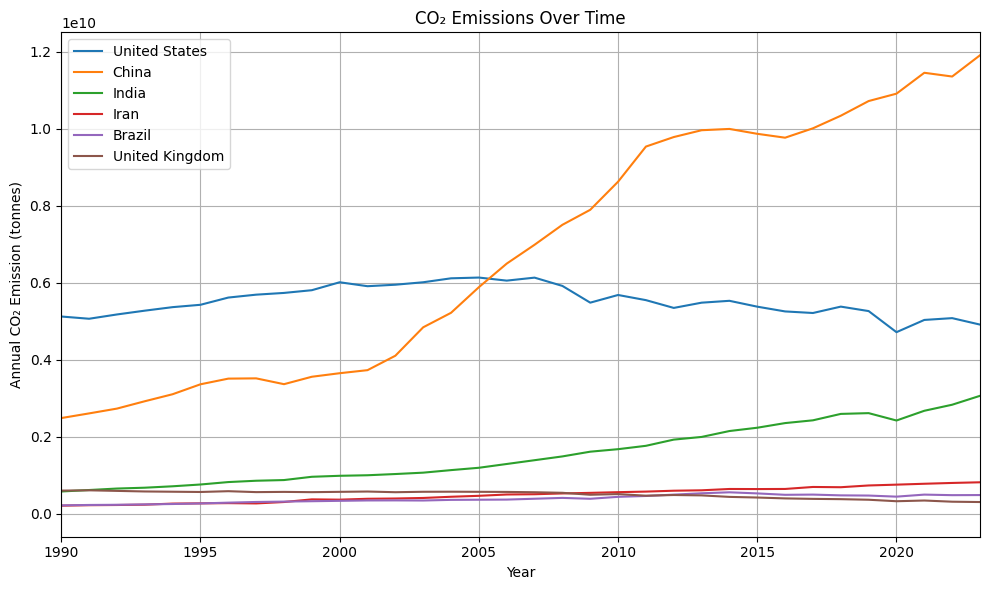

In [12]:
plt.figure(figsize=(10, 6))
for country in countries:
    subset = filtered_df[filtered_df["Entity"] == country]
    plt.plot(subset["Year"], subset["Annual_CO2_emissions"], label=country)

plt.title("CO₂ Emissions Over Time")
plt.xlabel("Year")
plt.ylabel("Annual CO₂ Emission (tonnes)")
plt.xlim(1990, 2023)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
years = [1990, 2023]
change_df = filtered_df[filtered_df["Year"].isin(years)]

pivot = change_df.pivot(index="Entity", columns="Year", values="Annual_CO2_emissions")

pivot = pivot.dropna(subset=[1990, 2023])
pivot = pivot[pivot[1990] != 0]

pivot["% Change (1990-2023)"] = ((pivot[2023] - pivot[1990]) / pivot[1990]) * 100
pivot_sorted = pivot.sort_values("% Change (1990-2023)", ascending=False)
pivot_sorted


Year,1990,2023,% Change (1990-2023)
Entity,,,
India,5.779960e+08,3.062324e+09,429.817594
China,2.484855e+09,1.190250e+10,379.001952
Iran,2.110746e+08,8.178799e+08,287.483791
Brazil,2.186580e+08,4.864701e+08,122.479891
United States,5.120957e+09,4.911391e+09,-4.092321
United Kingdom,6.019451e+08,3.051463e+08,-49.306616


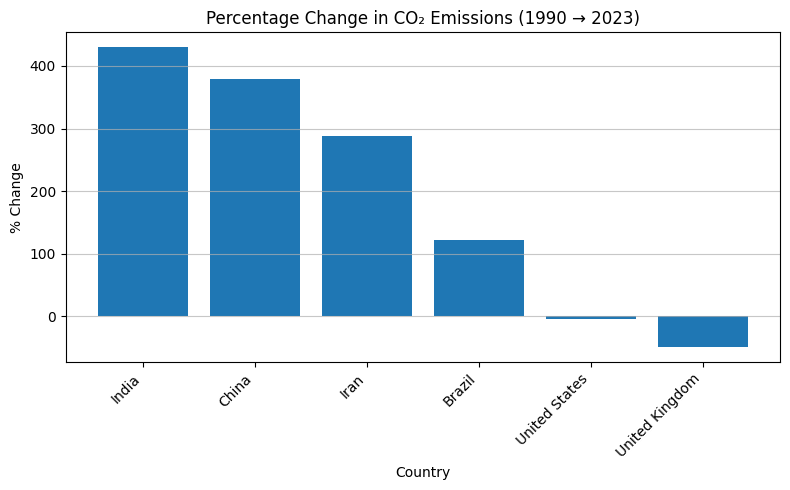

In [14]:
plt.figure(figsize=(8, 5))
plt.bar(pivot_sorted.index, pivot_sorted["% Change (1990-2023)"])
plt.title("Percentage Change in CO₂ Emissions (1990 → 2023)")
plt.xlabel("Country")
plt.ylabel("% Change")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='-', alpha=0.7)
plt.tight_layout()
plt.show()


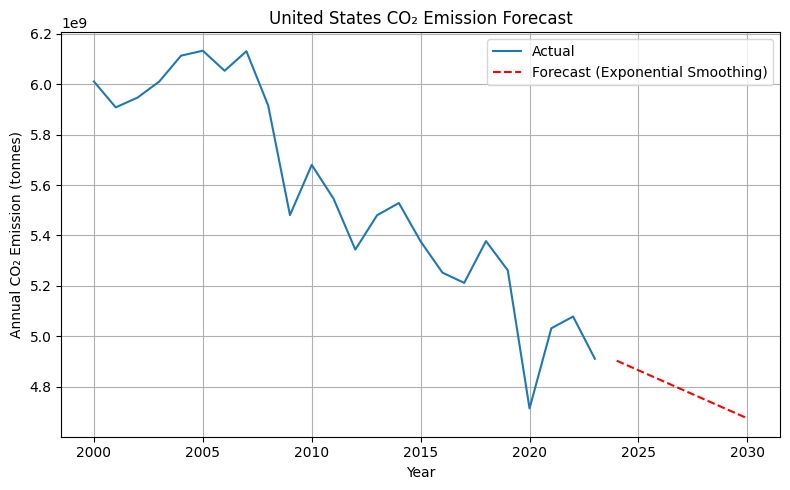

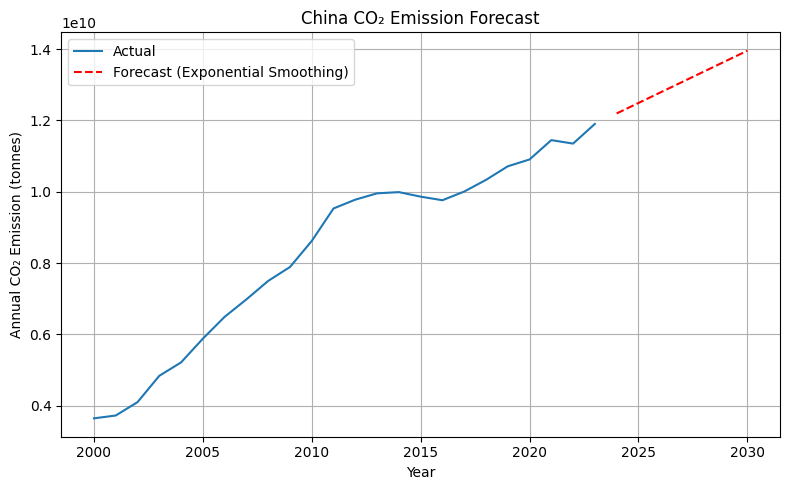

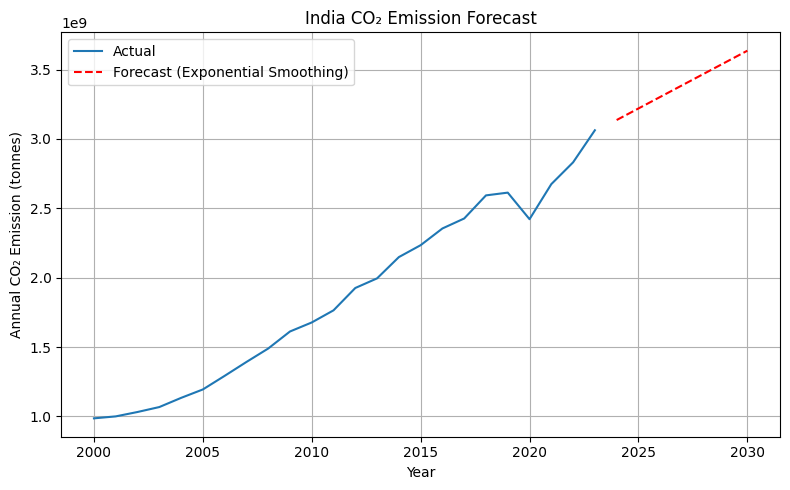

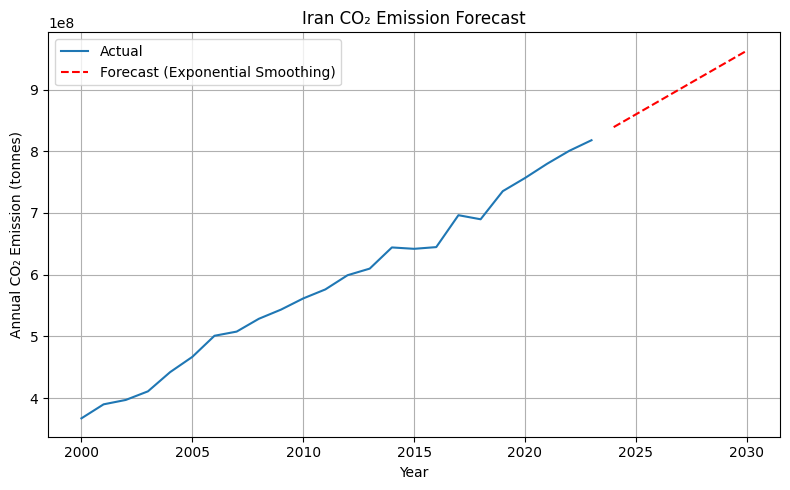

c:\Users\joelj\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:903: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


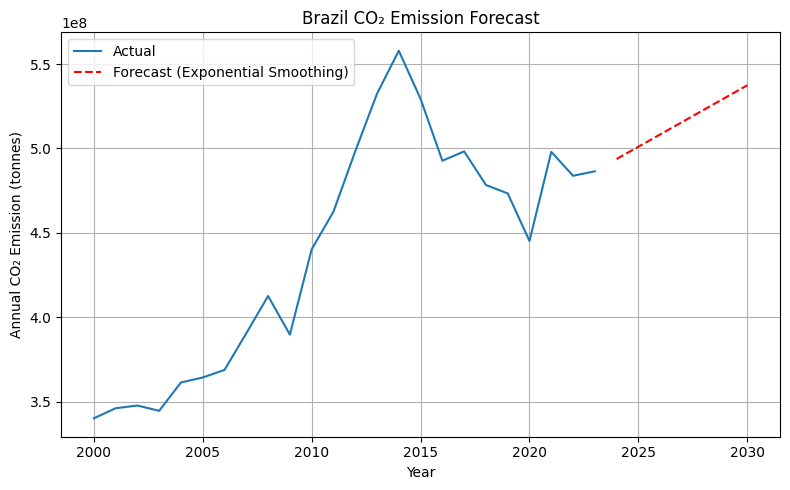

c:\Users\joelj\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:903: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


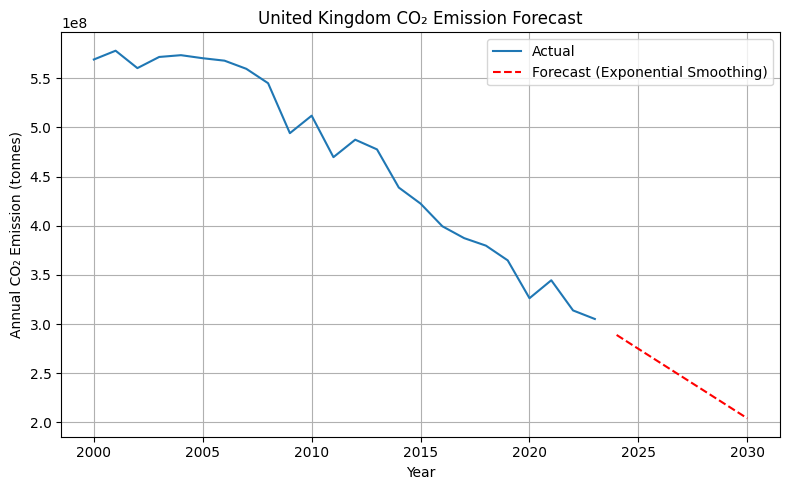

In [21]:
for country in countries:
    subset = filtered_df[filtered_df["Entity"] == country]
    subset = subset[subset["Year"] >= 2000]

    if subset.empty:
        continue

    years = subset["Year"].values
    emissions = subset["Annual_CO2_emissions"].values

    try:
        model = ExponentialSmoothing(emissions, trend='add', seasonal=None)
        fit = model.fit(optimized=True)
    except Exception as e:
        print(f"Could not fit model for {country}: {e}")
        continue

    future_steps = 2030 - subset["Year"].max()
    forecast = fit.forecast(future_steps)

    future_years = np.arange(subset["Year"].max() + 1, 2031)

    plt.figure(figsize=(8, 5))
    plt.plot(subset["Year"], emissions, label="Actual")
    plt.plot(future_years, forecast, "r--", label="Forecast (Exponential Smoothing)")
    plt.title(f"{country} CO₂ Emission Forecast")
    plt.xlabel("Year")
    plt.ylabel("Annual CO₂ Emission (tonnes)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


13:34:22 - cmdstanpy - INFO - Chain [1] start processing
13:34:22 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\joelj\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


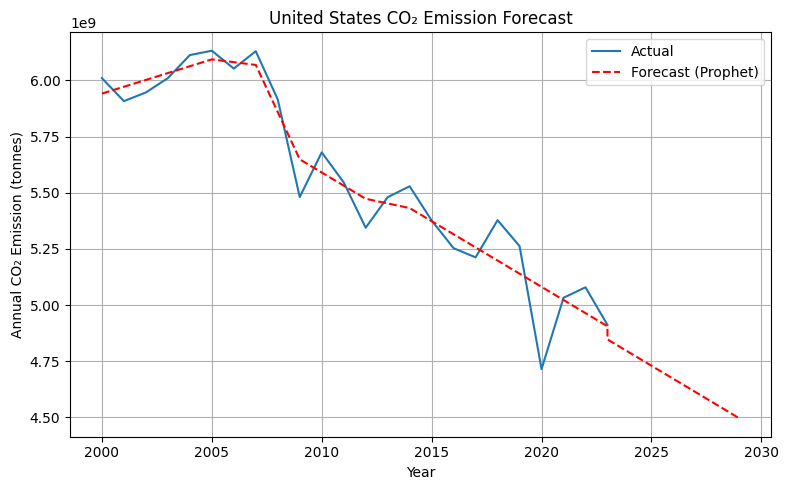

13:34:23 - cmdstanpy - INFO - Chain [1] start processing
13:34:23 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\joelj\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


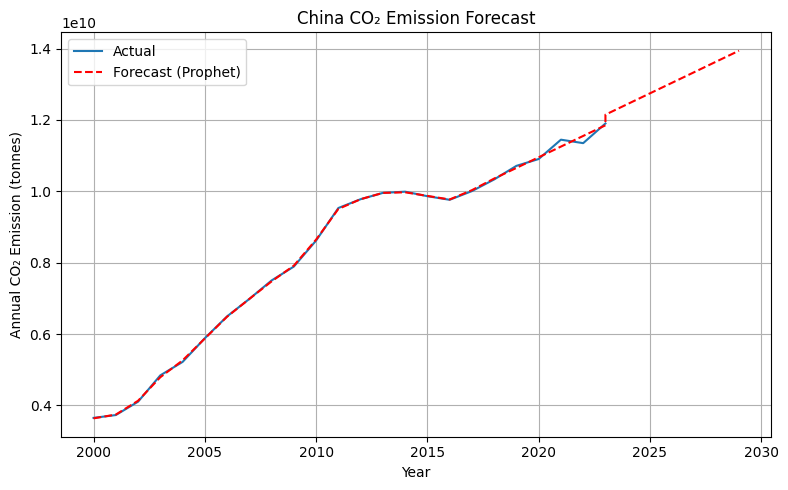

13:34:23 - cmdstanpy - INFO - Chain [1] start processing
13:34:23 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\joelj\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


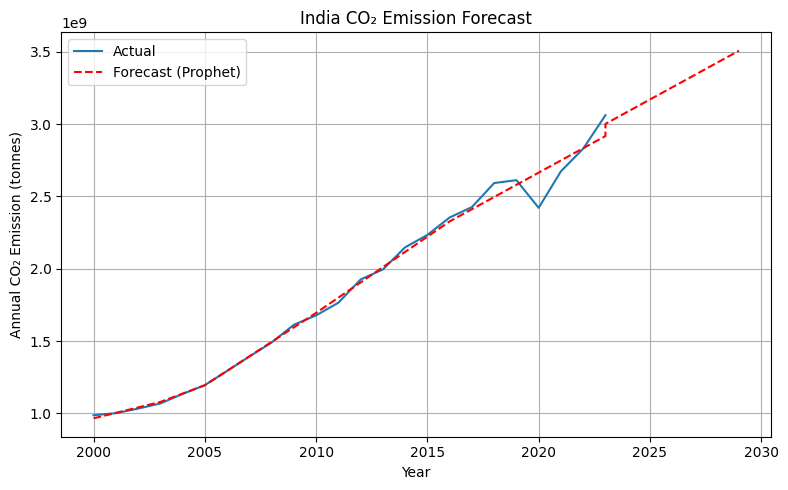

13:34:23 - cmdstanpy - INFO - Chain [1] start processing
13:34:23 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\joelj\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


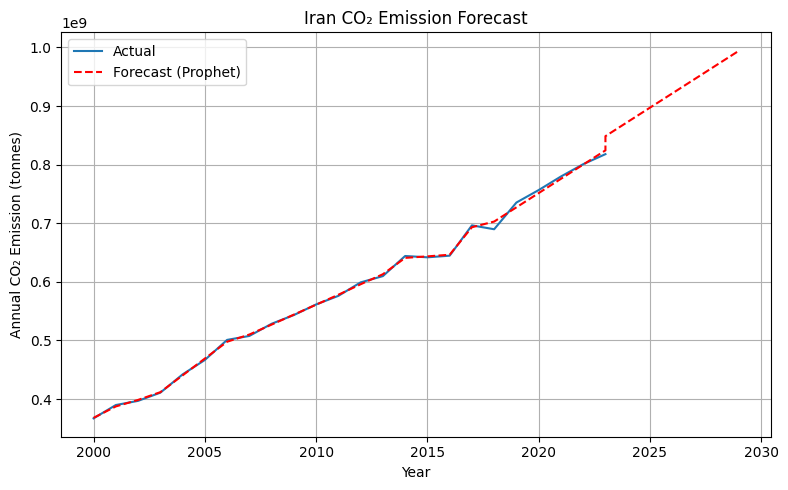

13:34:23 - cmdstanpy - INFO - Chain [1] start processing
13:34:23 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\joelj\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


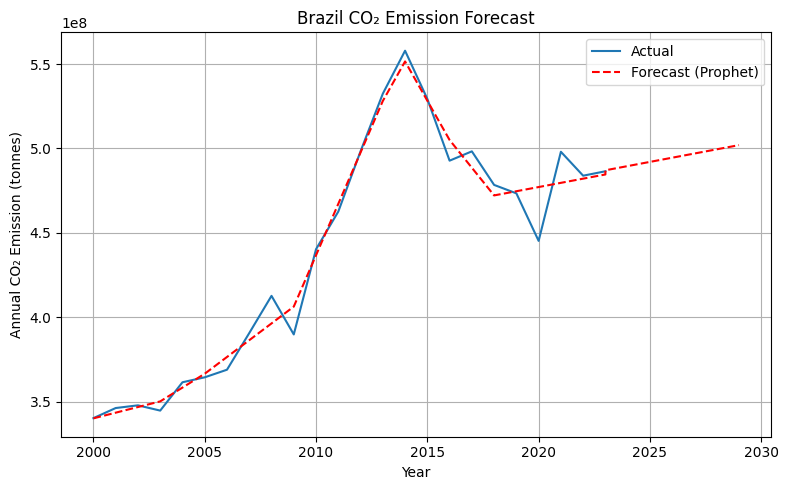

13:34:23 - cmdstanpy - INFO - Chain [1] start processing
13:34:24 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\joelj\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


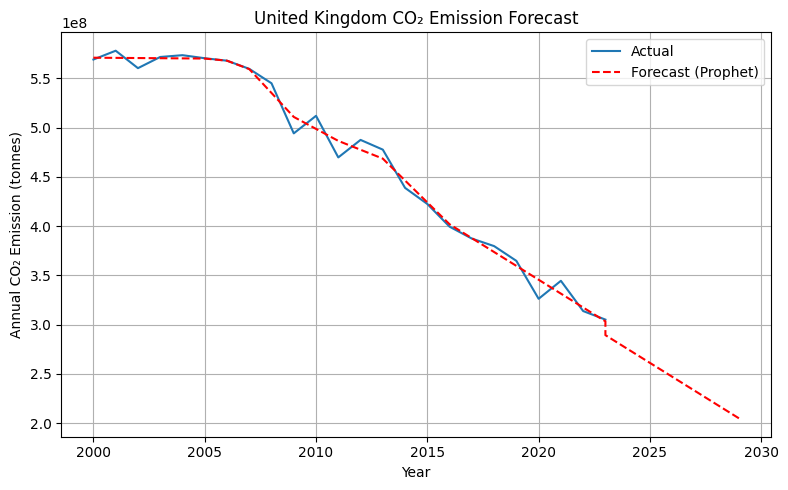

In [ ]:
for country in countries:
    subset = filtered_df[filtered_df["Entity"] == country]
    subset = subset[subset["Year"] >= 2000]
    if subset.empty:
        continue

    df_prophet = pd.DataFrame({
        "ds": pd.to_datetime(subset["Year"], format="%Y"),
        "y": subset["Annual_CO2_emissions"]
    })

    try:
        model = Prophet(yearly_seasonality=False, changepoint_prior_scale=0.6)
        model.fit(df_prophet)
        future = model.make_future_dataframe(periods=2030 - subset["Year"].max(), freq='Y')
        forecast = model.predict(future)
    except Exception as e:
        print(f"Could not fit Prophet for {country}: {e}")
        continue

    plt.figure(figsize=(8, 5))
    plt.plot(subset["Year"], subset["Annual_CO2_emissions"], label="Actual")
    plt.plot(forecast["ds"].dt.year, forecast["yhat"], "r--", label="Forecast (Prophet)")
    plt.title(f"{country} CO₂ Emission Forecast")
    plt.xlabel("Year")
    plt.ylabel("Annual CO₂ Emission (tonnes)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
